In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from netCDF4 import Dataset
import os
import pandas as pd
import math as math
import datetime
from datetime import timedelta
import os
import glob
import matplotlib.dates as dates
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter, YearLocator
from magnetometer_utils import *
from model_utils import *

In [2]:
def GetIndices(Data):
##################################################################
## Función para extraer los índices de un objeto Pandas.DataFrame 
## o Pandas.Series con columnas: 'Year', 'DayOfYear' y 'Hour'.
## Input: Pandas.DataFrame o Pandas.Series - Data
## Output: datetime - dates.
##################################################################
    YYYY = Data['Year']
    DD = Data['DayOfYear']
    hh = Data['Hour']
    fechas = []
    for Y, D, h in zip(YYYY, DD, hh):
        str_temp = '%d-%02d' % (Y,D) 
        fecha = datetime.datetime.strptime(str_temp,'%Y-%j')
        M = fecha.month
        D = fecha.day
        fecha = datetime.datetime(Y, M, D, h, 0, 0)
        fechas.append(fecha)
    dates = pd.to_datetime(fechas)

    return dates

In [3]:
def Get3daysSeries(year,month,day1):
########################################################################
## Función para extraer la serie de tiempo de Dst, H, X, Y y Z de 3 días.
## Input: int - year, int - month, int - day.
## Output: 
##         pandas.Series - Dst,
##         pandas.Series - H,
##         pandas.Series - X,
##         pandas.Series - Y,
##         pandas.Series - Z,
#######################################################################
    day_ref = day1   
    day2 = day1+1
    day3 = day2+1
    day4 = day3+1
    str_month = GetMonth(month)
    filename_indices = "hourly-geomagnetic-indices-%02d-%d.txt" % (month, year)
    directory =  '%s-%d-Data/Jicamarca' % (str_month,year)
    magFile_ref = 'jica_%02d%02d%02d.min' % (year-2000,month,day_ref)
    magData_ref = pd.read_csv(directory+os.sep+magFile_ref,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm", "H(nT)","Z(nT)","I(deg)"])
    h_field_ref = GetTimesSeriesH(magData_ref)# - baseline_series
    x_field_ref, y_field_ref, z_field_ref = GetTimesSeriesXYZ(magData_ref)
    magFile_roj = 'jica_%02d%02d%02d.min' % (year-2000,month,day1)
    magData_roj = pd.read_csv(directory+os.sep+magFile_roj,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm", "H(nT)","Z(nT)","I(deg)"])
    h_field_roj = GetTimesSeriesH(magData_roj)# - baseline_series
    x_field_roj, y_field_roj, z_field_roj = GetTimesSeriesXYZ(magData_roj)
    time1 = datetime.datetime(h_field_roj.index.year[0], h_field_roj.index.month[0], h_field_roj.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
    time2 = datetime.datetime(h_field_roj.index.year[0], h_field_roj.index.month[0], h_field_roj.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=5)

    baseline_roj = h_field_roj[time1:time2].mean()
    h_field_sub_roj = h_field_roj #- baseline_roj

    magFile_roj2 = 'jica_%02d%02d%02d.min' % (year-2000,month,day2)
    magData_roj2 = pd.read_csv(directory+os.sep+magFile_roj2,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm", "H(nT)","Z(nT)","I(deg)"])
    h_field_roj2 = GetTimesSeriesH(magData_roj2)# - baseline_series
    x_field_roj2, y_field_roj2, z_field_roj2 = GetTimesSeriesXYZ(magData_roj2)
    time1 = datetime.datetime(h_field_roj2.index.year[0], h_field_roj2.index.month[0], h_field_roj2.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
    time2 = datetime.datetime(h_field_roj2.index.year[0], h_field_roj2.index.month[0], h_field_roj2.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=5)
    baseline_roj2 = h_field_roj2[time1:time2].mean()
    h_field_sub_roj2 = h_field_roj2 #- baseline_roj2

    magFile_roj3 = 'jica_%02d%02d%02d.min' % (year-2000,month,day3)
    magData_roj3 = pd.read_csv(directory+os.sep+magFile_roj3,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm", "H(nT)","Z(nT)","I(deg)"])
    h_field_roj3 = GetTimesSeriesH(magData_roj3)# - baseline_series
    x_field_roj3, y_field_roj3, z_field_roj3 = GetTimesSeriesXYZ(magData_roj3)
    time1 = datetime.datetime(h_field_roj3.index.year[0], h_field_roj3.index.month[0], h_field_roj3.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
    time2 = datetime.datetime(h_field_roj3.index.year[0], h_field_roj3.index.month[0], h_field_roj3.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=5)
    baseline_roj3 = h_field_roj3[time1:time2].mean()
    h_field_sub_roj3 = h_field_roj3 #- baseline_roj3
        
    magFile_roj4 = 'jica_%02d%02d%02d.min' % (year-2000,month,day4)
    magData_roj4 = pd.read_csv(directory+os.sep+magFile_roj4,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm", "H(nT)","Z(nT)","I(deg)"])
    h_field_roj4 = GetTimesSeriesH(magData_roj4)# - baseline_series
    x_field_roj4, y_field_roj4, z_field_roj4 = GetTimesSeriesXYZ(magData_roj4)
    time1 = datetime.datetime(h_field_roj4.index.year[0], h_field_roj4.index.month[0], h_field_roj4.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
    time2 = datetime.datetime(h_field_roj4.index.year[0], h_field_roj4.index.month[0], h_field_roj4.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=5)
    baseline_roj4 = h_field_roj4[time1:time2].mean()
    h_field_sub_roj4 = h_field_roj4 #- baseline_roj3
    #########################################################
    h_ref = h_field_ref.loc['%d-%02d-%02d 00:00:00' % (year,month, day_ref)]#.plot()
    x_ref = x_field_ref.loc['%d-%02d-%02d 00:00:00' % (year,month,day_ref)]
    y_ref = y_field_ref.loc['%d-%02d-%02d 00:00:00' % (year,month,day_ref)]
    z_ref = z_field_ref.loc['%d-%02d-%02d 00:00:00' % (year,month,day_ref)]
    h_series = pd.concat([h_field_sub_roj, h_field_sub_roj2, h_field_sub_roj3,h_field_sub_roj4], axis=0, sort=True) - h_ref
    x_series = pd.concat([x_field_roj, x_field_roj2, x_field_roj3,x_field_roj4], axis=0, sort=True) - x_ref
    y_series = pd.concat([y_field_roj, y_field_roj2, y_field_roj3,y_field_roj4], axis=0, sort=True) - y_ref
    z_series = pd.concat([z_field_roj, z_field_roj2, z_field_roj3,z_field_roj4], axis=0, sort=True) - z_ref
    ##################################################################3
    Data = pd.read_csv(filename_indices,delimiter=r"\s+")#
    indices = GetIndices(Data)
    Data.set_index(indices, inplace=True)
    #########################################################################
    kp_series = pd.Series(Data['Kp'].values, index=indices)
    F107_series = pd.Series(Data['F107'].values, index=indices)
    Dst_series = pd.Series(Data['Dst'].values, index=indices)
    dst_lim_low = np.ones(Data['Kp'].shape)*(-50)
    dst_lim_0 = np.ones(Data['Kp'].shape)*(0)
    dst_lim0 = pd.Series(dst_lim_0, index=indices)
    dst_lim = pd.Series(dst_lim_low, index=indices)
    moderate_lim = np.ones(Data['Kp'].shape)*100
    mod_lim_kp = np.ones(Data['Kp'].shape)*5
    kp_moderate = pd.Series(mod_lim_kp, index=indices)
    F107_moderate = pd.Series(moderate_lim, index=indices)
    high_lim = np.ones(Data['Kp'].shape)*150
    F107_high = pd.Series(high_lim, index=indices)
    ################################################################
    str_i = '%d-%02d-%d 00:00:00' % (year,month,day1)
    str_f = '%d-%02d-%d 23:59:00' % (year,month,day3+1)
    Dst_3 = Dst_series[str_i:str_f]
    Kp_3  = kp_series[str_i:str_f]
    
    return Kp_3,Dst_3,h_series, x_series, y_series, z_series

In [4]:
##################################################################################
#### Aquí se colocan a mano los días del mes con tormentas.
##################################################################################
day1 = 4#1
day2 = 12#12
day3 = 22#18
day4 = 25#24
year = 2023
month = 11#9
day_ref=day1
str_month = GetMonth(month)
#########################################################################################
#### Extrayendo las series de tiempo de 3 días de los días mencionados.
#########################################################################################
Kp_1, Dst_1, h_series1, x_series1, y_series1, z_series1 = Get3daysSeries(year,month,day1)
Kp_2, Dst_2, h_series2, x_series2, y_series2, z_series2 = Get3daysSeries(year,month,day2)
Kp_3, Dst_3, h_series3, x_series3, y_series3, z_series3 = Get3daysSeries(year,month,day3)
Kp_4, Dst_4, h_series4, x_series4, y_series4, z_series4 = Get3daysSeries(year,month,day4)
#########################################################################################
#### Pasando los valores de las series de tiempo a arreglos para dibujar.
#########################################################################################
variation_H1 = np.array(h_series1.values)
time_H1 = np.array(h_series1.index.values)
variation_H2 = np.array(h_series2.values)
time_H2 = np.array(h_series2.index.values)
variation_H3 = np.array(h_series3.values)
time_H3 = np.array(h_series3.index.values)
variation_H4 = np.array(h_series4.values)
time_H4 = np.array(h_series4.index.values)

### Graficando las series de tiempo de la variación diurna de H vs. Dst
### para los 4 días de tormentas del mes

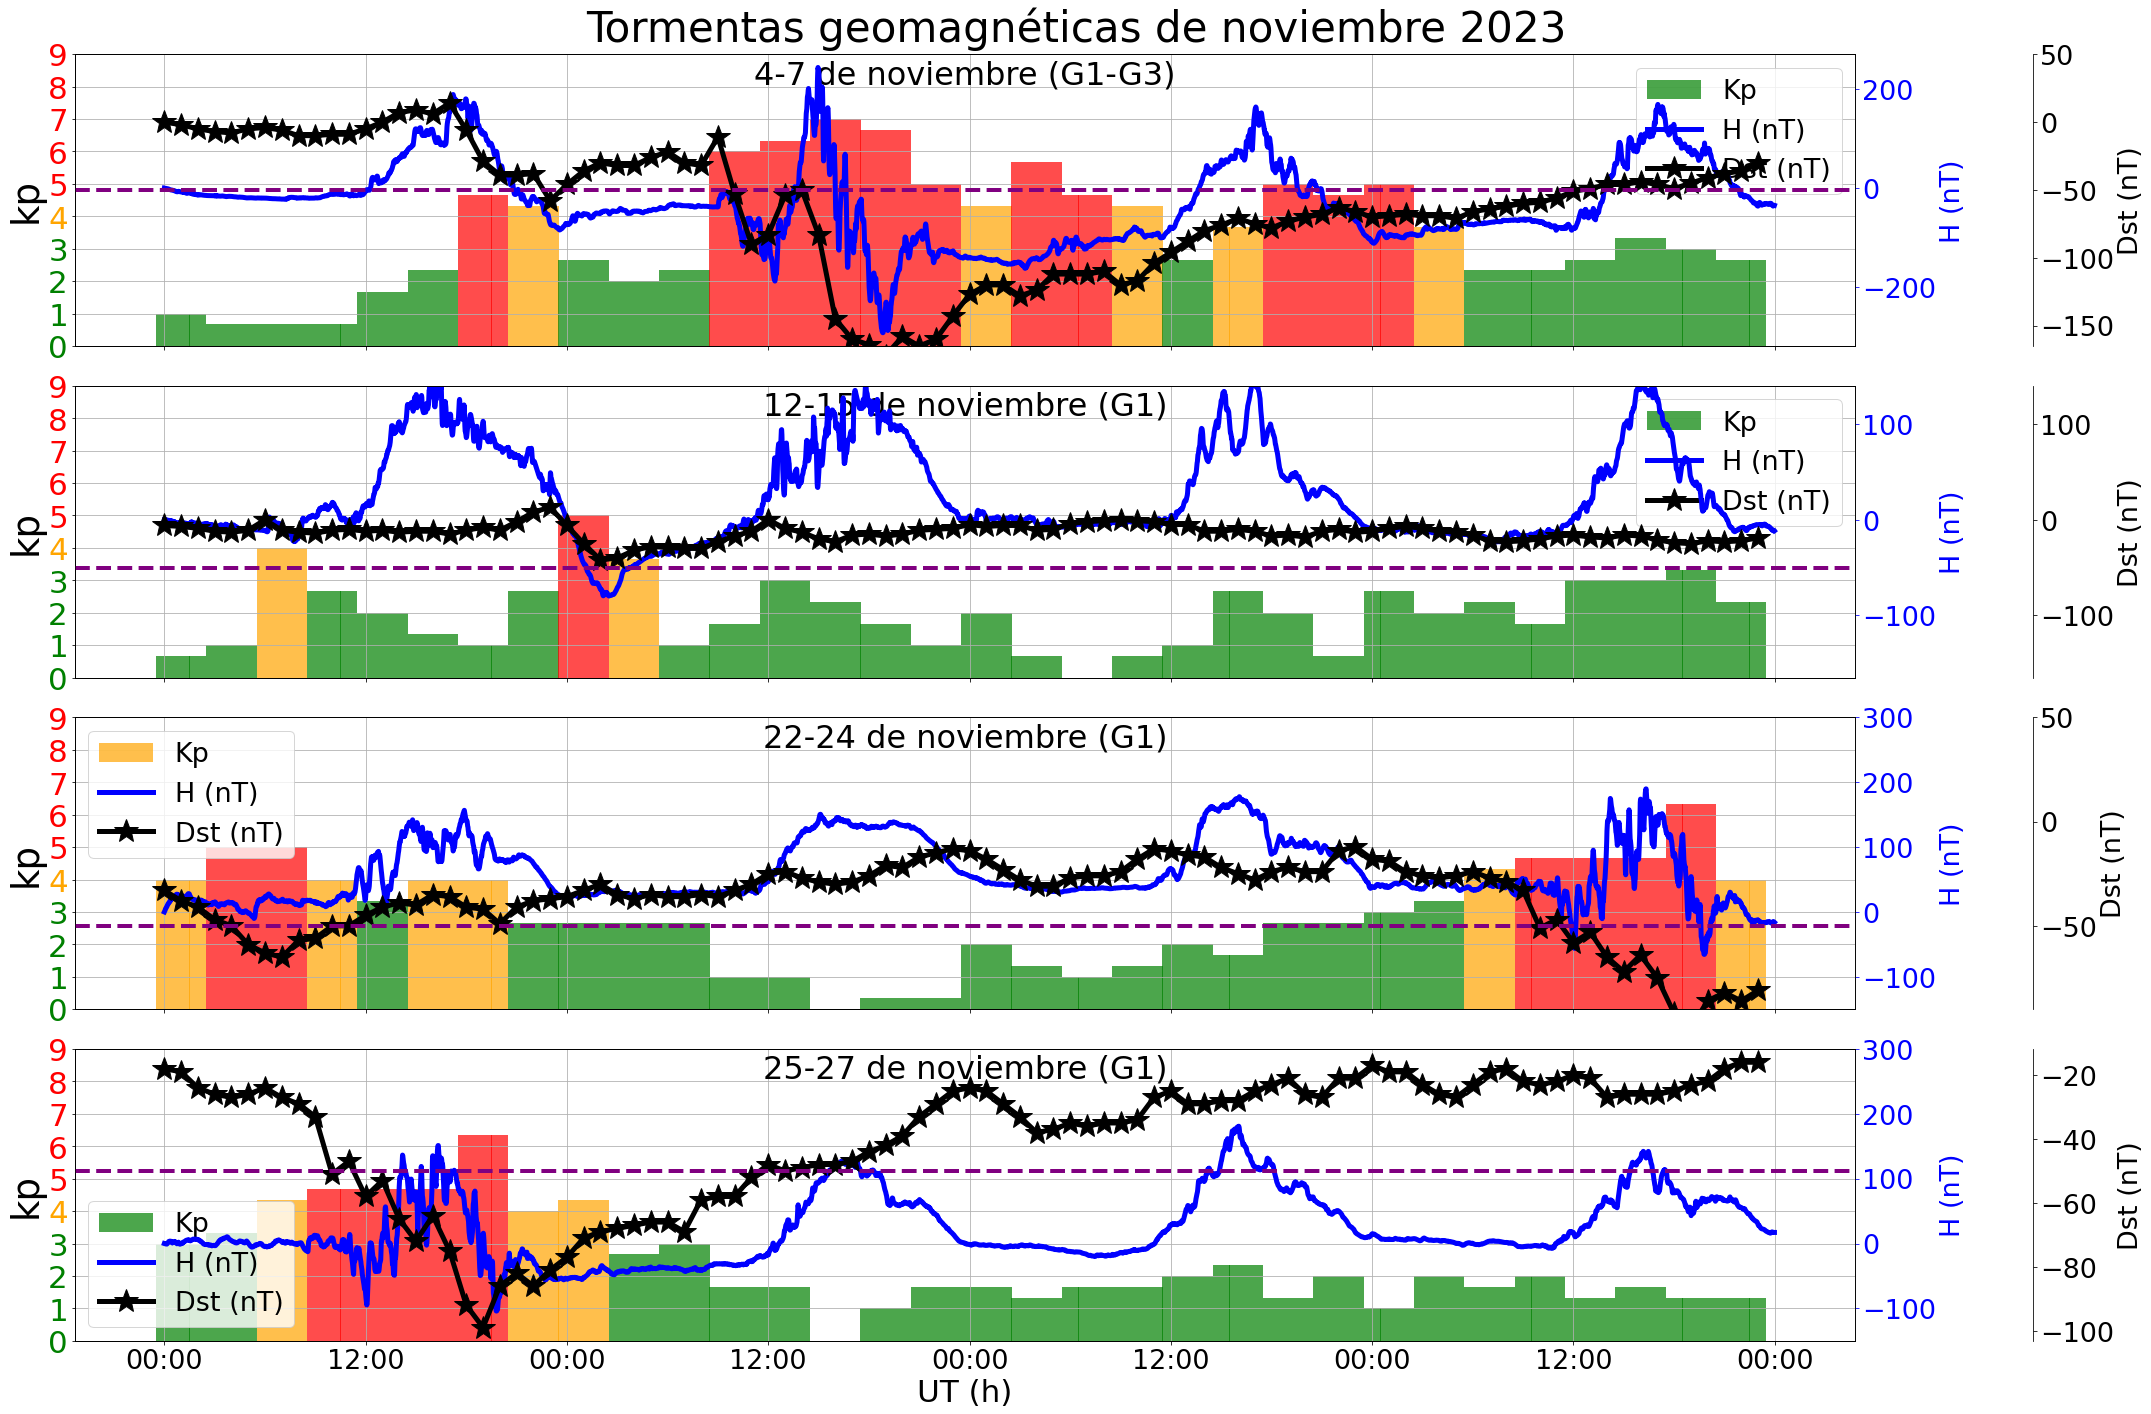

In [5]:
fontsize=27
fig, ax = plt.subplots(4,1,figsize=(30,20),sharex=True,tight_layout=True)
dt_start  = datetime.datetime(year,month,day1,14,49,0)
str_start = dt_start.strftime("%d/%H:%M")
myFmt = mdates.DateFormatter('%H:%M')
###########################################################################################################3
clrs0 =  ['green' if kp < 35  else 'orange' if kp<45 else 'red' for kp in Kp_1]
ax[0].bar(np.array(Kp_1.index),np.array(Kp_1.values)/10,color=clrs0,width=0.042,label='Kp',alpha=0.7)#,markersize=imageSize[0]*(dpi/ 96))#.plot()
kp_labels = [0,1,2,3,4,5,6,7,8,9]
ax[0].set_yticks(kp_labels)
ax[0].xaxis_date()
ax[0].xaxis.set_major_formatter(myFmt)
ax[0].xaxis.set_tick_params(labelsize=fontsize+4)
ax[0].yaxis.set_tick_params(labelsize=fontsize+4)
ax[0].set_ylim(0,9)
ax[0].get_yticklabels()[0].set_color("green")
ax[0].get_yticklabels()[1].set_color("green")
ax[0].get_yticklabels()[2].set_color("green")
ax[0].get_yticklabels()[3].set_color("green")
ax[0].get_yticklabels()[4].set_color("orange")
ax[0].get_yticklabels()[5].set_color("red")
ax[0].get_yticklabels()[6].set_color("red")
ax[0].get_yticklabels()[7].set_color("red")
ax[0].get_yticklabels()[8].set_color("red")
ax[0].get_yticklabels()[9].set_color("red")
ax[0].set_ylabel('kp',fontsize=fontsize+10)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].grid()
ax3 = ax[0].twinx()
ax3.plot(time_H1, variation_H1, label='H (nT)',color='blue',lw=5)
ax3.xaxis_date()
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_ylabel('H (nT)',fontsize=fontsize,color='blue')
ax3.xaxis.set_tick_params(labelsize=fontsize)
ax3.yaxis.set_tick_params(labelsize=fontsize,colors='blue')
ax3.yaxis.label.set_color('blue')
ax4 = ax[0].twinx()
ax4.spines.right.set_position(("axes", 1.1))
ax4.plot(np.array(Dst_1.index), np.array(Dst_1), label='Dst (nT)',color='black',marker='*',lw=5, markersize=25)
ax4.xaxis.set_tick_params(labelsize=fontsize)
ax4.yaxis.set_tick_params(labelsize=fontsize,colors='black')
ax4.axhline(y=-50,linestyle='--', lw=4,color='purple')
ax4.set_ylabel('Dst (nT)',fontsize=fontsize,color='black')
ax4.spines["right"].set_edgecolor('black')
ax4.set_ylim(-165,50)
lines1, labels1 = ax[0].get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
labels = [labels1[0],labels3[0], labels4[0]]
ax[0].legend(lines1+lines3+lines4,labels,loc='best',fontsize=fontsize)
ax[0].text(.5,.9,'%d-%d de %s (G1-G3)' % (day1, day1+3, str_month.lower()),
        horizontalalignment='center',
        transform=ax[0].transAxes,fontsize=fontsize+5)
##############################################################################################
clrs1 =  ['green' if kp < 35  else 'orange' if kp<45 else 'red' for kp in Kp_2]
ax[1].bar(np.array(Kp_1.index),np.array(Kp_2.values)/10,color=clrs1,width=0.042,label='Kp',alpha=0.7)#,markersize=imageSize[0]*(dpi/ 96))#.plot()
kp_labels = [0,1,2,3,4,5,6,7,8,9]#[0,10,20,30,40,50,60,70,80,90]
ax[1].set_yticks(kp_labels)
ax[1].xaxis_date()
ax[1].xaxis.set_major_formatter(myFmt)
ax[1].xaxis.set_tick_params(labelsize=fontsize+4)
ax[1].yaxis.set_tick_params(labelsize=fontsize+4)
ax[1].set_ylim(0,9)
ax[1].get_yticklabels()[0].set_color("green")
ax[1].get_yticklabels()[1].set_color("green")
ax[1].get_yticklabels()[2].set_color("green")
ax[1].get_yticklabels()[3].set_color("green")
ax[1].get_yticklabels()[4].set_color("orange")
ax[1].get_yticklabels()[5].set_color("red")
ax[1].get_yticklabels()[6].set_color("red")
ax[1].get_yticklabels()[7].set_color("red")
ax[1].get_yticklabels()[8].set_color("red")
ax[1].get_yticklabels()[9].set_color("red")
ax[1].set_ylabel('kp',fontsize=fontsize+10)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].grid()
ax3 = ax[1].twinx()
ax3.plot(time_H1, variation_H2, label='H (nT)',color='blue',lw=5)
ax3.xaxis_date()
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_ylabel('H (nT)',fontsize=fontsize,color='blue')
ax3.xaxis.set_tick_params(labelsize=fontsize)
ax3.yaxis.set_tick_params(labelsize=fontsize,colors='blue')
ax3.yaxis.label.set_color('blue')
ax3.set_ylim(-165,140)
ax4 = ax[1].twinx()
ax4.spines.right.set_position(("axes", 1.1))
ax4.plot(np.array(Dst_1.index), np.array(Dst_2), label='Dst (nT)',color='black',marker='*',lw=5, markersize=25)
ax4.xaxis.set_tick_params(labelsize=fontsize)
ax4.yaxis.set_tick_params(labelsize=fontsize,colors='black')
ax4.axhline(y=-50,linestyle='--', lw=4,color='purple')
ax4.set_ylabel('Dst (nT)',fontsize=fontsize,color='black')
ax4.spines["right"].set_edgecolor('black')
ax4.set_ylim(-165,140)
lines1, labels1 = ax[0].get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
labels = [labels1[0],labels3[0], labels4[0]]
ax[1].legend(lines1+lines3+lines4,labels,loc='best',fontsize=fontsize)
ax[1].text(.5,.9,'%d-%d de %s (G1)' % (day2, day2+3, str_month.lower()),
        horizontalalignment='center',
        transform=ax[1].transAxes,fontsize=fontsize+5)
##############################################################################
clrs2 =  ['green' if kp < 35  else 'orange' if kp<45 else 'red' for kp in Kp_3]
ax[2].bar(np.array(Kp_1.index),np.array(Kp_3.values)/10,color=clrs2,width=0.042,label='Kp',alpha=0.7)#,markersize=imageSize[0]*(dpi/ 96))#.plot()
kp_labels = [0,1,2,3,4,5,6,7,8,9]#[0,10,20,30,40,50,60,70,80,90]
ax[2].set_yticks(kp_labels)
ax[2].xaxis_date()
ax[2].xaxis.set_major_formatter(myFmt)
ax[2].xaxis.set_tick_params(labelsize=fontsize+4)
ax[2].yaxis.set_tick_params(labelsize=fontsize+4)
ax[2].set_ylim(0,9)
ax[2].get_yticklabels()[0].set_color("green")
ax[2].get_yticklabels()[1].set_color("green")
ax[2].get_yticklabels()[2].set_color("green")
ax[2].get_yticklabels()[3].set_color("green")
ax[2].get_yticklabels()[4].set_color("orange")
ax[2].get_yticklabels()[5].set_color("red")
ax[2].get_yticklabels()[6].set_color("red")
ax[2].get_yticklabels()[7].set_color("red")
ax[2].get_yticklabels()[8].set_color("red")
ax[2].get_yticklabels()[9].set_color("red")
ax[2].set_ylabel('kp',fontsize=fontsize+10)
ax[2].xaxis.set_tick_params(labelsize=fontsize)
ax[2].grid()
ax3 = ax[2].twinx()
ax3.plot(time_H1, variation_H3, label='H (nT)',color='blue',lw=5)
ax3.xaxis_date()
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_xlabel("UT (h)", fontsize=fontsize)
ax3.set_ylabel('H (nT)',fontsize=fontsize,color='blue')
ax3.xaxis.set_tick_params(labelsize=fontsize)
ax3.yaxis.set_tick_params(labelsize=fontsize,colors='blue')
ax3.yaxis.label.set_color('blue')
ax3.set_ylim(-150,300)
ax4 = ax[2].twinx()
ax4.spines.right.set_position(("axes", 1.1))
ax4.plot(np.array(Dst_1.index), np.array(Dst_3), label='Dst (nT)',color='black',marker='*',lw=5, markersize=25)
ax4.xaxis.set_tick_params(labelsize=fontsize)
ax4.yaxis.set_tick_params(labelsize=fontsize,colors='black')
ax4.axhline(y=-50,linestyle='--', lw=4,color='purple')
ax4.set_ylabel('Dst (nT)',fontsize=fontsize,color='black')
ax4.spines["right"].set_edgecolor('black')
ax4.set_ylim(-90,50)
lines1, labels1 = ax[2].get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
labels = [labels1[0],labels3[0], labels4[0]]
ax[2].legend(lines1+lines3+lines4,labels,loc='upper left',fontsize=fontsize)
ax[2].text(.5,.9,'%d-%d de %s (G1)' % (day3, day3+2, str_month.lower()),
        horizontalalignment='center',
        transform=ax[2].transAxes,fontsize=fontsize+5)
################################################################
############################################################################3
clrs3 =  ['green' if kp < 35  else 'orange' if kp<45 else 'red' for kp in Kp_4]
ax[3].bar(np.array(Kp_1.index),np.array(Kp_4.values)/10,color=clrs3,width=0.042,label='Kp',alpha=0.7)#,markersize=imageSize[0]*(dpi/ 96))#.plot()
kp_labels = [0,1,2,3,4,5,6,7,8,9]#[0,10,20,30,40,50,60,70,80,90]
ax[3].set_yticks(kp_labels)
ax[3].xaxis_date()
ax[3].xaxis.set_major_formatter(myFmt)
ax[3].xaxis.set_tick_params(labelsize=fontsize+4)
ax[3].yaxis.set_tick_params(labelsize=fontsize+4)
ax[3].set_xlabel("UT (h)", fontsize=fontsize+4)
ax[3].set_ylim(0,9)
ax[3].get_yticklabels()[0].set_color("green")
ax[3].get_yticklabels()[1].set_color("green")
ax[3].get_yticklabels()[2].set_color("green")
ax[3].get_yticklabels()[3].set_color("green")
ax[3].get_yticklabels()[4].set_color("orange")
ax[3].get_yticklabels()[5].set_color("red")
ax[3].get_yticklabels()[6].set_color("red")
ax[3].get_yticklabels()[7].set_color("red")
ax[3].get_yticklabels()[8].set_color("red")
ax[3].get_yticklabels()[9].set_color("red")
ax[3].set_ylabel('kp',fontsize=fontsize+10)
ax[3].xaxis.set_tick_params(labelsize=fontsize)
ax[3].grid()
ax3 = ax[3].twinx()
ax3.plot(time_H1, variation_H4, label='H (nT)',color='blue',lw=5)
ax3.xaxis_date()
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_ylabel('H (nT)',fontsize=fontsize,color='blue')
ax3.xaxis.set_tick_params(labelsize=fontsize)
ax3.yaxis.set_tick_params(labelsize=fontsize,colors='blue')
ax3.yaxis.label.set_color('blue')
ax3.set_ylim(-150,300)
ax4 = ax[3].twinx()
ax4.spines.right.set_position(("axes", 1.1))
ax4.plot(np.array(Dst_1.index), np.array(Dst_4), label='Dst (nT)',color='black',marker='*',lw=5, markersize=25)
ax4.xaxis.set_tick_params(labelsize=fontsize)
ax4.yaxis.set_tick_params(labelsize=fontsize,colors='black')
ax4.axhline(y=-50,linestyle='--', lw=4,color='purple')
ax4.set_ylabel('Dst (nT)',fontsize=fontsize,color='black')
ax4.spines["right"].set_edgecolor('black')
fig.tight_layout()
lines1, labels1 = ax[3].get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
labels = [labels1[0],labels3[0], labels4[0]]
ax[3].legend(lines1+lines3+lines4,labels,loc='lower left',fontsize=fontsize)
ax[3].text(.5,.9,'%d-%d de %s (G1)' % (day4, day4+2, str_month.lower()),
        horizontalalignment='center',
        transform=ax[3].transAxes,fontsize=fontsize+5)
fig.suptitle('Tormentas geomagnéticas de %s %d' % (str_month.lower(),year), fontsize=fontsize+15)
plots_boletin = '/home/jp/Desktop-ROJ/Plots-Boletines/%02d/%s' % (year,str_month)


### Determinando los 5 días más tranquilos del mes con datos de OMNIWeb.

In [6]:
filename_indices = "hourly-geomagnetic-indices-%02d-%d.txt" % (month, year)
Data = pd.read_csv(filename_indices,delimiter=r"\s+")#
indices = GetIndices(Data) #- timedelta(hours=5)
Data.set_index(indices, inplace=True)
df_5days = Data.copy().resample('1d').mean()

In [10]:
df_new = df_5days.drop(columns=['Year','DayOfYear'])
df_new['Day'] = df_new.index.day
quietDays = df_new.nsmallest(5, 'Kp')
quietDays = df_new.nsmallest(5, 'Kp')['Day'].values

### Asignando los archivos de los 5 días más tranquilos:

In [12]:
qd_files= []
for qd in quietDays:
    filename_aux = 'jica_%d%02d%02d.min' % (year-2000,month,qd)
    print(filename_aux)
    qd_files.append(filename_aux)

jica_231118.min
jica_231117.min
jica_231103.min
jica_231119.min
jica_231111.min


### Calculando primero la suma sobre los días tranquilos (H, X, Y y Z)

In [17]:
h_prom = np.zeros(1440)
x_prom = np.zeros(1440)
y_prom = np.zeros(1440)
z_prom = np.zeros(1440)
count=0
directory =  '%s-%d-Data/Jicamarca' % (str_month,year)
for fl in qd_files:
    print("File name: ",fl)        
    magData_roj = pd.read_csv(directory+os.sep+fl,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
    h_field_roj = GetTimesSeriesH(magData_roj)
    x_field, y_field, z_field = GetTimesSeriesXYZ(magData_roj)
    time1 = datetime.datetime(h_field_roj.index.year[0], h_field_roj.index.month[0], h_field_roj.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
    time2 = datetime.datetime(h_field_roj.index.year[0], h_field_roj.index.month[0], h_field_roj.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=5)
    baseline_roj = h_field_roj[time1:time2].mean()
    h_field_sub_roj = h_field_roj #- baseline_roj
    x_field_sub_roj = x_field #- offset_x
    y_field_sub_roj = y_field #- offset_y
    z_field_sub_roj = z_field #- offset_z
    h_prom = h_prom + h_field_sub_roj.values
    x_prom = x_prom + x_field_sub_roj.values
    y_prom = y_prom + y_field_sub_roj.values
    z_prom = z_prom + z_field_sub_roj.values
    count+=1

File name:  jica_231118.min
File name:  jica_231117.min
File name:  jica_231103.min
File name:  jica_231119.min
File name:  jica_231111.min


### Posteriormente, el promedio:

In [14]:
h_avg = h_prom/count
x_avg = x_prom/count
y_avg = y_prom/count
z_avg = z_prom/count
print(h_avg.shape)

(1440,)


###  Dibujamos el promedio de los días tranquilos:

Text(0.5, 0.98, 'Promedio de los 5 días más tranquilos del mes (qd)')

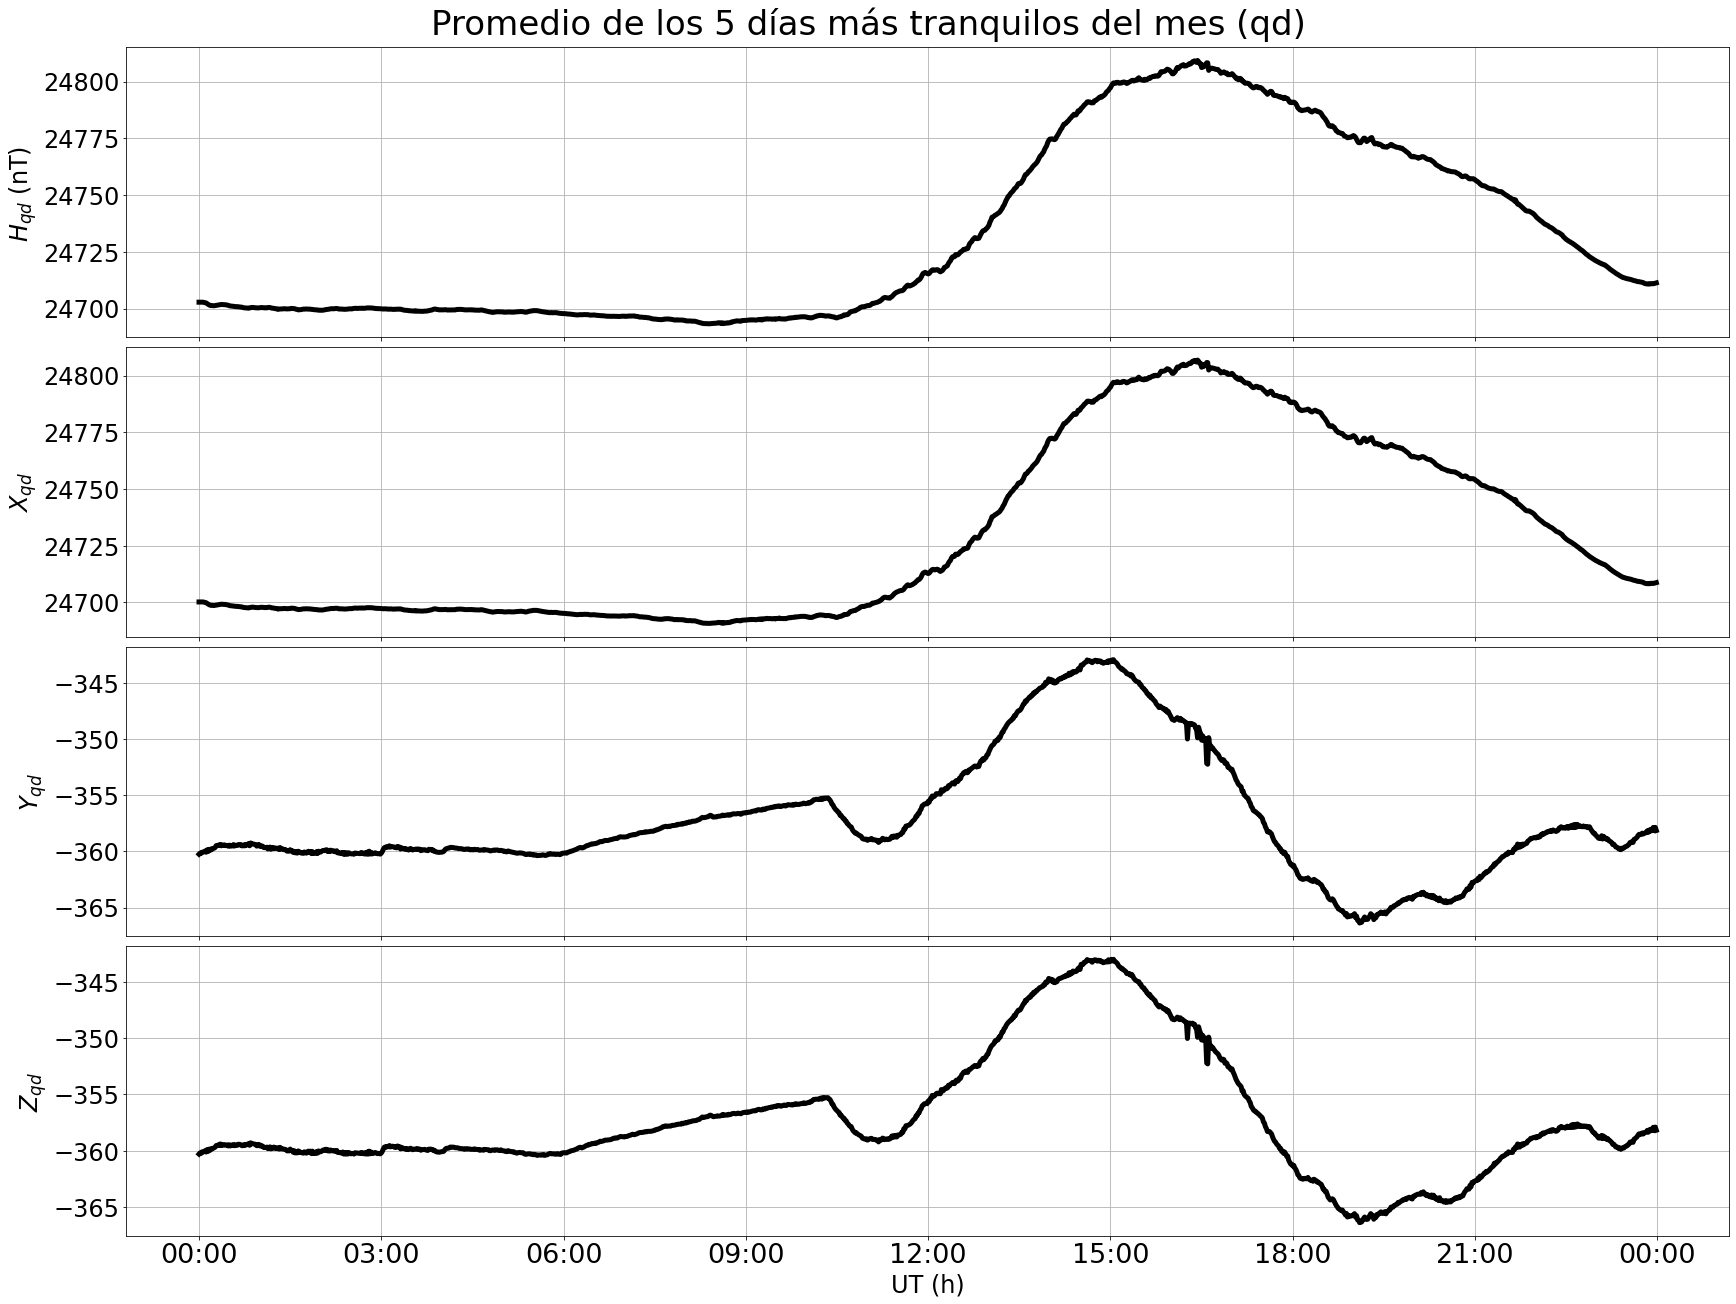

In [18]:
fontsize=24
lw = 5
date_format = mdates.DateFormatter("%H:%M")
fig, ax = plt.subplots(4,1,figsize=(24,18),sharex=True,constrained_layout=True)
ax[0].plot(np.array(h_field_roj.index),h_avg,lw=lw,color='black')
ax[0].xaxis_date()
ax[0].xaxis.set_major_formatter(date_format)
ax[0].set_ylabel(r'$H_{qd}$ (nT) ', fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=fontsize+3)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].grid()
ax[1].plot(np.array(h_field_roj.index),x_avg,lw=lw,color='black')
ax[1].xaxis_date()
ax[1].xaxis.set_major_formatter(date_format)
ax[1].set_ylabel(r'$X_{qd}$', fontsize=fontsize)
ax[1].xaxis.set_tick_params(labelsize=fontsize+3)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].grid()
ax[2].plot(np.array(h_field_roj.index),y_avg,lw=lw,color='black')
ax[2].xaxis_date()
ax[2].xaxis.set_major_formatter(date_format)
ax[2].set_ylabel(r'$Y_{qd}$', fontsize=fontsize)
ax[2].xaxis.set_tick_params(labelsize=fontsize+3)
ax[2].yaxis.set_tick_params(labelsize=fontsize)
ax[2].grid()
ax[3].plot(np.array(h_field_roj.index),z_avg,lw=lw,color='black')
ax[3].xaxis_date()
ax[3].xaxis.set_major_formatter(date_format)
ax[3].set_xlabel('UT (h)', fontsize=fontsize)
ax[3].set_ylabel(r'$Z_{qd}$', fontsize=fontsize)
ax[3].xaxis.set_tick_params(labelsize=fontsize+3)
ax[3].yaxis.set_tick_params(labelsize=fontsize)
ax[3].grid()
fig.suptitle(r'Promedio de los 5 días más tranquilos del mes (qd)',fontsize=fontsize+10)

### Estableciendo los días de tormenta de manera manual y calculando las perturbaciones mediante la resta del promedio de los días tranquilos. 

In [52]:
storm_day1 = day1
filename_pert1 = 'jica_%02d%02d%02d.min' % (year-2000,month,storm_day1)
magData_roj1 = pd.read_csv(directory+os.sep+filename_pert1,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj1 = GetTimesSeriesH(magData_roj1)
x_field_roj1, y_field_roj1, z_field_roj1 = GetTimesSeriesXYZ(magData_roj1)
time1 = datetime.datetime(h_field_roj1.index.year[0], h_field_roj1.index.month[0], h_field_roj1.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
time2 = datetime.datetime(h_field_roj1.index.year[0], h_field_roj1.index.month[0], h_field_roj1.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=5)
baseline_roj1 = h_field_roj1[time1:time2].mean()
h_field_sub_pert1 = h_field_roj1 #- baseline_roj1
x_field_sub_pert1 = x_field_roj1 #- baseline_roj1
y_field_sub_pert1 = y_field_roj1 #
z_field_sub_pert1 = z_field_roj1 
h_delta1 = h_field_sub_pert1 -h_avg
x_delta1 = x_field_sub_pert1 -x_avg
y_delta1 = y_field_sub_pert1 -y_avg
z_delta1 = z_field_sub_pert1 -z_avg

day2 = 5
storm_day2 = day2
filename_pert2 = 'jica_%02d%02d%02d.min' % (year-2000,month,storm_day2)
magData_roj2 = pd.read_csv(directory+os.sep+filename_pert2,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj2 = GetTimesSeriesH(magData_roj2)
x_field_roj2, y_field_roj2, z_field_roj2 = GetTimesSeriesXYZ(magData_roj2)
time1 = datetime.datetime(h_field_roj2.index.year[0], h_field_roj2.index.month[0], h_field_roj2.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
time2 = datetime.datetime(h_field_roj2.index.year[0], h_field_roj2.index.month[0], h_field_roj2.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=5)
baseline_roj2 = h_field_roj2[time1:time2].mean()
h_field_sub_pert2 = h_field_roj2 #- baseline_roj1
x_field_sub_pert2 = x_field_roj2 #- baseline_roj1
y_field_sub_pert2 = y_field_roj2 #
z_field_sub_pert2 = z_field_roj2 
h_delta2 = h_field_sub_pert2 -h_avg
x_delta2 = x_field_sub_pert2 -x_avg
y_delta2 = y_field_sub_pert2 -y_avg
z_delta2 = z_field_sub_pert2 -z_avg

day3 = 6
storm_day3 = day3
filename_pert3 = 'jica_%02d%02d%02d.min' % (year-2000,month,storm_day3)
magData_roj3 = pd.read_csv(directory+os.sep+filename_pert3,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj3 = GetTimesSeriesH(magData_roj3)
x_field_roj3, y_field_roj3, z_field_roj3 = GetTimesSeriesXYZ(magData_roj3)
time1 = datetime.datetime(h_field_roj3.index.year[0], h_field_roj3.index.month[0], h_field_roj3.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
time2 = datetime.datetime(h_field_roj3.index.year[0], h_field_roj3.index.month[0], h_field_roj3.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=5)
baseline_roj3= h_field_roj3[time1:time2].mean()
h_field_sub_pert3 = h_field_roj3 #- baseline_roj1
x_field_sub_pert3 = x_field_roj3 #- baseline_roj1
y_field_sub_pert3 = y_field_roj3 #
z_field_sub_pert3 = z_field_roj3 
h_delta3 = h_field_sub_pert3 -h_avg
x_delta3 = x_field_sub_pert3 -x_avg
y_delta3 = y_field_sub_pert3 -y_avg
z_delta3 = z_field_sub_pert3 -z_avg

day4 = 7
storm_day4 = day4
filename_pert4 = 'jica_%02d%02d%02d.min' % (year-2000,month,storm_day4)
magData_roj4 = pd.read_csv(directory+os.sep+filename_pert4,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj4 = GetTimesSeriesH(magData_roj4)
h_field_roj4 = h_field_roj4.resample('1T').fillna(method=None)
x_field_roj4, y_field_roj4, z_field_roj4 = GetTimesSeriesXYZ(magData_roj4)
time1 = datetime.datetime(h_field_roj4.index.year[0], h_field_roj4.index.month[0], h_field_roj4.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
time2 = datetime.datetime(h_field_roj4.index.year[0], h_field_roj4.index.month[0], h_field_roj4.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=5)
baseline_roj4= h_field_roj4[time1:time2].mean()
h_field_sub_pert4 = h_field_roj4 #- baseline_roj1
x_field_sub_pert4 = x_field_roj4 #- baseline_roj1
y_field_sub_pert4 = y_field_roj4 # 
z_field_sub_pert4 = z_field_roj4 
h_delta4 = h_field_sub_pert4 -h_avg
x_delta4 = x_field_sub_pert4 -x_avg
y_delta4 = y_field_sub_pert4 -y_avg
z_delta4 = z_field_sub_pert4 -z_avg

#h_delta_a = pd.concat([h_delta1, h_delta2, h_delta3,h_delta4], axis=0, sort=True) #- h_ref

In [53]:
day5 = 12
storm_day5 = day5
filename_pert5 = 'jica_%d%02d%02d.min' % (year-2000,month, storm_day5)
magData_roj5 = pd.read_csv(directory+os.sep+filename_pert5,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj5 = GetTimesSeriesH(magData_roj5)
x_field_roj5, y_field_roj5, z_field_roj5 = GetTimesSeriesXYZ(magData_roj5)
time1 = datetime.datetime(h_field_roj5.index.year[0], h_field_roj5.index.month[0], h_field_roj5.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
time2 = datetime.datetime(h_field_roj5.index.year[0], h_field_roj5.index.month[0], h_field_roj5.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=5)
baseline_roj5 = h_field_roj5[time1:time2].mean()
h_field_sub_pert5 = h_field_roj5 #- baseline_roj2
x_field_sub_pert5 = x_field_roj5 #- baseline_roj1
y_field_sub_pert5 = y_field_roj5 #
z_field_sub_pert5 = z_field_roj5 
h_delta5 = h_field_sub_pert5 -h_avg
x_delta5 = x_field_sub_pert5 -x_avg
y_delta5 = y_field_sub_pert5 -y_avg
z_delta5 = z_field_sub_pert5 -z_avg
###################################################################################
day6 = 13
storm_day6 = day6
filename_pert6 = 'jica_%d%02d%02d.min' % (year-2000,month, storm_day6)
magData_roj6 = pd.read_csv(directory+os.sep+filename_pert6,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj6 = GetTimesSeriesH(magData_roj6)
x_field_roj6, y_field_roj6, z_field_roj6 = GetTimesSeriesXYZ(magData_roj6)
time1 = datetime.datetime(h_field_roj6.index.year[0], h_field_roj6.index.month[0], h_field_roj6.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=6)
time2 = datetime.datetime(h_field_roj6.index.year[0], h_field_roj6.index.month[0], h_field_roj6.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=6)
baseline_roj6 = h_field_roj6[time1:time2].mean()
h_field_sub_pert6 = h_field_roj6 #- baseline_roj2
x_field_sub_pert6 = x_field_roj6 #- baseline_roj1
y_field_sub_pert6 = y_field_roj6 #
z_field_sub_pert6 = z_field_roj6
h_delta6 = h_field_sub_pert6 -h_avg
x_delta6 = x_field_sub_pert6 -x_avg
y_delta6 = y_field_sub_pert6 -y_avg
z_delta6 = z_field_sub_pert6 -z_avg
#####################################################################################
day7 = 14
storm_day7 = day7
filename_pert7 = 'jica_%d%02d%02d.min' % (year-2000,month, storm_day7)
magData_roj7 = pd.read_csv(directory+os.sep+filename_pert7,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj7 = GetTimesSeriesH(magData_roj7)
x_field_roj7, y_field_roj7, z_field_roj7 = GetTimesSeriesXYZ(magData_roj7)
time1 = datetime.datetime(h_field_roj7.index.year[0], h_field_roj7.index.month[0], h_field_roj7.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=7)
time2 = datetime.datetime(h_field_roj7.index.year[0], h_field_roj7.index.month[0], h_field_roj7.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=7)
baseline_roj7 = h_field_roj7[time1:time2].mean()
h_field_sub_pert7 = h_field_roj7 #- baseline_roj2
x_field_sub_pert7 = x_field_roj7 #- baseline_roj1
y_field_sub_pert7 = y_field_roj7 #
z_field_sub_pert7 = z_field_roj7
h_delta7 = h_field_sub_pert7 -h_avg
x_delta7 = x_field_sub_pert7 -x_avg
y_delta7 = y_field_sub_pert7 -y_avg
z_delta7 = z_field_sub_pert7 -z_avg
###################################################################################
day8 = 15
storm_day8 = day8
filename_pert8 = 'jica_%d%02d%02d.min' % (year-2000,month, storm_day8)
magData_roj8 = pd.read_csv(directory+os.sep+filename_pert8,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj8 = GetTimesSeriesH(magData_roj8)
x_field_roj8, y_field_roj8, z_field_roj8 = GetTimesSeriesXYZ(magData_roj8)
time1 = datetime.datetime(h_field_roj8.index.year[0], h_field_roj8.index.month[0], h_field_roj8.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=8)
time2 = datetime.datetime(h_field_roj8.index.year[0], h_field_roj8.index.month[0], h_field_roj8.index.day[0], 8, 0, 0) #- pd.Timedelta(hours=8)
baseline_roj8 = h_field_roj8[time1:time2].mean()
h_field_sub_pert8 = h_field_roj8 #- baseline_roj2
x_field_sub_pert8 = x_field_roj8 #- baseline_roj1
y_field_sub_pert8 = y_field_roj8 #
z_field_sub_pert8 = z_field_roj8
h_delta8 = h_field_sub_pert8 -h_avg
x_delta8 = x_field_sub_pert8 -x_avg
y_delta8 = y_field_sub_pert8 -y_avg
z_delta8 = z_field_sub_pert8 -z_avg
##################################################################
#h_delta_b = pd.concat([h_delta5, h_delta6, h_delta7,h_delta8], axis=0, sort=True) #- h_ref


In [54]:
storm_day3 = day3#14
filename_pert3 = 'jica_23%02d%02d.min' % (month,storm_day3)
magData_roj3 = pd.read_csv(directory+os.sep+filename_pert3,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj3 = GetTimesSeriesH(magData_roj3)
x_field_roj3, y_field_roj3, z_field_roj3 = GetTimesSeriesXYZ(magData_roj3)
    #h_list.append()
time1 = datetime.datetime(h_field_roj3.index.year[0], h_field_roj3.index.month[0], h_field_roj3.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
time2 = datetime.datetime(h_field_roj3.index.year[0], h_field_roj3.index.month[0], h_field_roj3.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=5)
baseline_roj3 = h_field_roj3[time1:time2].mean()
h_field_sub_pert3 = h_field_roj3 #- baseline_roj3
x_field_sub_pert3 = x_field_roj3 #- baseline_roj1
y_field_sub_pert3 = y_field_roj3 #
z_field_sub_pert3 = z_field_roj3 
h_delta3 = h_field_sub_pert3 -h_avg
x_delta3 = x_field_sub_pert3 -x_avg
y_delta3 = y_field_sub_pert3 -y_avg
z_delta3 = z_field_sub_pert3 -z_avg

In [55]:
storm_day4 = 21#day3#16
filename_pert4 = 'jica_%d%02d%02d.min' % (year-2000,month,storm_day4)
magData_roj4 = pd.read_csv(directory+os.sep+filename_pert4,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj4 = GetTimesSeriesH(magData_roj4)
x_field_roj4, y_field_roj4, z_field_roj4 = GetTimesSeriesXYZ(magData_roj4)
time1 = datetime.datetime(h_field_roj4.index.year[0], h_field_roj4.index.month[0], h_field_roj4.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
time2 = datetime.datetime(h_field_roj4.index.year[0], h_field_roj4.index.month[0], h_field_roj4.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=5)
baseline_roj4 = h_field_roj4[time1:time2].mean()
h_field_sub_pert4 = h_field_roj4 #- baseline_roj3
x_field_sub_pert4 = x_field_roj4 #- baseline_roj1
y_field_sub_pert4 = y_field_roj4 #
z_field_sub_pert4 = z_field_roj4 
h_delta4 = h_field_sub_pert4 -h_avg
x_delta4 = x_field_sub_pert4-x_avg
y_delta4 = y_field_sub_pert4 -y_avg
z_delta4 = z_field_sub_pert4 -z_avg

In [56]:
storm_day5 = 22#14#9
filename_pert5 = 'jica_%02d%02d%02d.min' % (year-2000,month,storm_day5)
magData_roj5 = pd.read_csv(directory+os.sep+filename_pert5,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj5 = GetTimesSeriesH(magData_roj5)
x_field_roj5, y_field_roj5, z_field_roj5 = GetTimesSeriesXYZ(magData_roj5)
time1 = datetime.datetime(h_field_roj5.index.year[0], h_field_roj5.index.month[0], h_field_roj5.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
time2 = datetime.datetime(h_field_roj5.index.year[0], h_field_roj5.index.month[0], h_field_roj5.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=5)
baseline_roj5 = h_field_roj5[time1:time2].mean()
h_field_sub_pert5 = h_field_roj5 #- baseline_roj3
x_field_sub_pert5 = x_field_roj5 #- baseline_roj1
y_field_sub_pert5 = y_field_roj5 #
z_field_sub_pert5 = z_field_roj5 
h_delta5 = h_field_sub_pert5 -h_avg
x_delta5 = x_field_sub_pert5 -x_avg
y_delta5 = y_field_sub_pert5 -y_avg
z_delta5 = z_field_sub_pert5 -z_avg

In [57]:
storm_day6 = 23#15#7
filename_pert6 = 'jica_23%02d%02d.min' % (month,storm_day6)
magData_roj6 = pd.read_csv(directory+os.sep+filename_pert6,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj6 = GetTimesSeriesH(magData_roj6)
x_field_roj6, y_field_roj6, z_field_roj6 = GetTimesSeriesXYZ(magData_roj6)
time1 = datetime.datetime(h_field_roj6.index.year[0], h_field_roj6.index.month[0], h_field_roj6.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
time2 = datetime.datetime(h_field_roj6.index.year[0], h_field_roj6.index.month[0], h_field_roj6.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=5)
baseline_roj6 = h_field_roj6[time1:time2].mean()
h_field_sub_pert6 = h_field_roj6 #- baseline_roj3
x_field_sub_pert6 = x_field_roj6 #- baseline_roj1
y_field_sub_pert6 = y_field_roj6 #
z_field_sub_pert6 = z_field_roj6 
h_delta6 = h_field_sub_pert6 -h_avg
x_delta6 = x_field_sub_pert6 -x_avg
y_delta6 = y_field_sub_pert6 -y_avg
z_delta6 = z_field_sub_pert6 -z_avg

In [58]:
storm_day7 = 24#15#7
filename_pert7 = 'jica_23%02d%02d.min' % (month,storm_day7)
magData_roj7 = pd.read_csv(directory+os.sep+filename_pert7,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj7 = GetTimesSeriesH(magData_roj7)
x_field_roj7, y_field_roj7, z_field_roj7 = GetTimesSeriesXYZ(magData_roj7)
time1 = datetime.datetime(h_field_roj7.index.year[0], h_field_roj7.index.month[0], h_field_roj7.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
time2 = datetime.datetime(h_field_roj7.index.year[0], h_field_roj7.index.month[0], h_field_roj7.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=5)
baseline_roj7 = h_field_roj7[time1:time2].mean()
h_field_sub_pert7 = h_field_roj7 #- baseline_roj3
x_field_sub_pert7 = x_field_roj7 #- baseline_roj1
y_field_sub_pert7 = y_field_roj7 #
z_field_sub_pert7 = z_field_roj7 
h_delta7 = h_field_sub_pert7 -h_avg
x_delta7 = x_field_sub_pert7 -x_avg
y_delta7 = y_field_sub_pert7 -y_avg
z_delta7 = z_field_sub_pert7 -z_avg
######################################################
storm_day8 = 25#15#8
filename_pert8 = 'jica_23%02d%02d.min' % (month,storm_day8)
magData_roj8 = pd.read_csv(directory+os.sep+filename_pert8,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj8 = GetTimesSeriesH(magData_roj8)
x_field_roj8, y_field_roj8, z_field_roj8 = GetTimesSeriesXYZ(magData_roj8)
time1 = datetime.datetime(h_field_roj8.index.year[0], h_field_roj8.index.month[0], h_field_roj8.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
time2 = datetime.datetime(h_field_roj8.index.year[0], h_field_roj8.index.month[0], h_field_roj8.index.day[0], 8, 0, 0) #- pd.Timedelta(hours=5)
baseline_roj8 = h_field_roj8[time1:time2].mean()
h_field_sub_pert8 = h_field_roj8 #- baseline_roj3
x_field_sub_pert8 = x_field_roj8 #- baseline_roj1
y_field_sub_pert8 = y_field_roj8 #
z_field_sub_pert8 = z_field_roj8 
h_delta8 = h_field_sub_pert8 -h_avg
x_delta8 = x_field_sub_pert8 -x_avg
y_delta8 = y_field_sub_pert8 -y_avg
z_delta8 = z_field_sub_pert8 -z_avg
#######################################################
storm_day9 = 26#15#9
filename_pert9 = 'jica_23%02d%02d.min' % (month,storm_day9)
magData_roj9 = pd.read_csv(directory+os.sep+filename_pert9,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj9 = GetTimesSeriesH(magData_roj9)
x_field_roj9, y_field_roj9, z_field_roj9 = GetTimesSeriesXYZ(magData_roj9)
time1 = datetime.datetime(h_field_roj9.index.year[0], h_field_roj9.index.month[0], h_field_roj9.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
time2 = datetime.datetime(h_field_roj9.index.year[0], h_field_roj9.index.month[0], h_field_roj9.index.day[0], 9, 0, 0) #- pd.Timedelta(hours=5)
baseline_roj9 = h_field_roj9[time1:time2].mean()
h_field_sub_pert9 = h_field_roj9 #- baseline_roj3
x_field_sub_pert9 = x_field_roj9 #- baseline_roj1
y_field_sub_pert9 = y_field_roj9 #
z_field_sub_pert9 = z_field_roj9 
h_delta9 = h_field_sub_pert9 -h_avg
x_delta9 = x_field_sub_pert9 -x_avg
y_delta9 = y_field_sub_pert9 -y_avg
z_delta9 = z_field_sub_pert9 -z_avg

In [59]:
storm_day10 = 12#15#10
filename_pert10 = 'jica_23%02d%02d.min' % (month,storm_day10)
magData_roj10 = pd.read_csv(directory+os.sep+filename_pert10,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj10 = GetTimesSeriesH(magData_roj10)
x_field_roj10, y_field_roj10, z_field_roj10 = GetTimesSeriesXYZ(magData_roj10)
time1 = datetime.datetime(h_field_roj10.index.year[0], h_field_roj10.index.month[0], h_field_roj10.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
time2 = datetime.datetime(h_field_roj10.index.year[0], h_field_roj10.index.month[0], h_field_roj10.index.day[0], 10, 0, 0) #- pd.Timedelta(hours=5)
baseline_roj10 = h_field_roj10[time1:time2].mean()
h_field_sub_pert10 = h_field_roj10 #- baseline_roj3
x_field_sub_pert10 = x_field_roj10 #- baseline_roj1
y_field_sub_pert10 = y_field_roj10 #
z_field_sub_pert10 = z_field_roj10
h_delta10 = h_field_sub_pert10 -h_avg
x_delta10 = x_field_sub_pert10 -x_avg
y_delta10 = y_field_sub_pert10 -y_avg
z_delta10 = z_field_sub_pert10 -z_avg
##############################################################################3
storm_day11 = 13#15#11
filename_pert11 = 'jica_23%02d%02d.min' % (month,storm_day11)
magData_roj11 = pd.read_csv(directory+os.sep+filename_pert11,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj11 = GetTimesSeriesH(magData_roj11)
x_field_roj11, y_field_roj11, z_field_roj11 = GetTimesSeriesXYZ(magData_roj11)
time1 = datetime.datetime(h_field_roj11.index.year[0], h_field_roj11.index.month[0], h_field_roj11.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
time2 = datetime.datetime(h_field_roj11.index.year[0], h_field_roj11.index.month[0], h_field_roj11.index.day[0], 11, 0, 0) #- pd.Timedelta(hours=5)
baseline_roj11 = h_field_roj11[time1:time2].mean()
h_field_sub_pert11 = h_field_roj11 #- baseline_roj3
x_field_sub_pert11 = x_field_roj11 #- baseline_roj1
y_field_sub_pert11 = y_field_roj11 #
z_field_sub_pert11 = z_field_roj11
h_delta11 = h_field_sub_pert11 -h_avg
x_delta11 = x_field_sub_pert11 -x_avg
y_delta11 = y_field_sub_pert11 -y_avg
z_delta11 = z_field_sub_pert11 -z_avg
##################################################################################
storm_day12 = 14#15#12
filename_pert12 = 'jica_23%02d%02d.min' % (month,storm_day12)
magData_roj12 = pd.read_csv(directory+os.sep+filename_pert12,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj12 = GetTimesSeriesH(magData_roj12)
x_field_roj12, y_field_roj12, z_field_roj12 = GetTimesSeriesXYZ(magData_roj12)
time1 = datetime.datetime(h_field_roj12.index.year[0], h_field_roj12.index.month[0], h_field_roj12.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
time2 = datetime.datetime(h_field_roj12.index.year[0], h_field_roj12.index.month[0], h_field_roj12.index.day[0], 12, 0, 0) #- pd.Timedelta(hours=5)
baseline_roj12 = h_field_roj12[time1:time2].mean()
h_field_sub_pert12 = h_field_roj12 #- baseline_roj3
x_field_sub_pert12 = x_field_roj12 #- baseline_roj1
y_field_sub_pert12 = y_field_roj12 #
z_field_sub_pert12 = z_field_roj12
h_delta12 = h_field_sub_pert12 -h_avg
x_delta12 = x_field_sub_pert12 -x_avg
y_delta12 = y_field_sub_pert12 -y_avg
z_delta12 = z_field_sub_pert12 -z_avg

In [60]:
storm_day13 = 24#15#10
filename_pert13 = 'jica_23%02d%02d.min' % (month,storm_day13)
magData_roj13 = pd.read_csv(directory+os.sep+filename_pert13,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj13 = GetTimesSeriesH(magData_roj13)
x_field_roj13, y_field_roj13, z_field_roj13 = GetTimesSeriesXYZ(magData_roj13)
time1 = datetime.datetime(h_field_roj13.index.year[0], h_field_roj13.index.month[0], h_field_roj13.index.day[0], 3, 0, 0) 
time2 = datetime.datetime(h_field_roj13.index.year[0], h_field_roj13.index.month[0], h_field_roj13.index.day[0], 10, 0, 0)
baseline_roj13 = h_field_roj13[time1:time2].mean()
h_field_sub_pert13 = h_field_roj13 #- baseline_roj3
x_field_sub_pert13 = x_field_roj13 #- baseline_roj1
y_field_sub_pert13 = y_field_roj13 #
z_field_sub_pert13 = z_field_roj13
h_delta13 = h_field_sub_pert13-h_avg
x_delta13 = x_field_sub_pert13 -x_avg
y_delta13 = y_field_sub_pert13 -y_avg
z_delta13 = z_field_sub_pert13 -z_avg

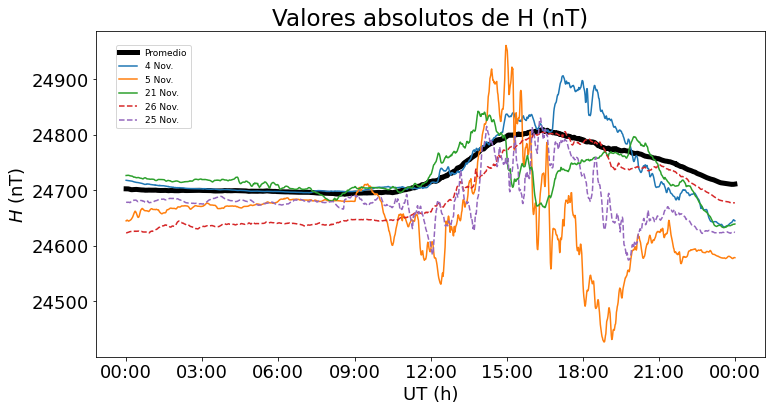

In [61]:
storm_day14 = 25#15#11
filename_pert14 = 'jica_23%02d%02d.min' % (month,storm_day14)
magData_roj14 = pd.read_csv(directory+os.sep+filename_pert14,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj14 = GetTimesSeriesH(magData_roj14)
x_field_roj14, y_field_roj14, z_field_roj14 = GetTimesSeriesXYZ(magData_roj14)
time1 = datetime.datetime(h_field_roj14.index.year[0], h_field_roj14.index.month[0], h_field_roj14.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
time2 = datetime.datetime(h_field_roj14.index.year[0], h_field_roj14.index.month[0], h_field_roj14.index.day[0], 11, 0, 0) #- pd.Timedelta(hours=5)
baseline_roj14 = h_field_roj14[time1:time2].mean()
aux_index = pd.date_range("2023-09-25 13:27:00", "2023-09-25 23:59:00", freq="1min")
aux_values = np.ones(aux_index.shape)*np.nan
aux_series = pd.Series(index=aux_index,data=aux_values)
h_field_sub_pert14 = h_field_roj14 #- baseline_roj3
x_field_sub_pert14 = x_field_roj14 #- baseline_roj1
y_field_sub_pert14 = y_field_roj14 #
z_field_sub_pert14 = z_field_roj14
h_delta14 = h_field_sub_pert14 -h_avg
x_delta14 = x_field_sub_pert14 -x_avg
y_delta14 = y_field_sub_pert14 -y_avg
z_delta14 = z_field_sub_pert14 -z_avg
##############################################################################3
storm_day15 = 26#15#12
filename_pert15 = 'jica_23%02d%02d.min' % (month,storm_day15)
magData_roj15 = pd.read_csv(directory+os.sep+filename_pert15,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)","I(deg)"])
h_field_roj15 = GetTimesSeriesH(magData_roj15)
x_field_roj15, y_field_roj15, z_field_roj15 = GetTimesSeriesXYZ(magData_roj15)
time1 = datetime.datetime(h_field_roj15.index.year[0], h_field_roj15.index.month[0], h_field_roj15.index.day[0], 3, 0, 0) 
time2 = datetime.datetime(h_field_roj15.index.year[0], h_field_roj15.index.month[0], h_field_roj15.index.day[0], 12, 0, 0) 
baseline_roj15 = h_field_roj15[time1:time2].mean()
h_field_sub_pert15 = h_field_roj15 #- baseline_roj3
x_field_sub_pert15 = x_field_roj15 #- baseline_roj1
y_field_sub_pert15 = y_field_roj15 #
z_field_sub_pert15 = z_field_roj15
h_delta15 = h_field_sub_pert15 -h_avg
x_delta15 = x_field_sub_pert15 -x_avg
y_delta15 = y_field_sub_pert15 -y_avg
z_delta15 = z_field_sub_pert15 -z_avg

fontsize=18
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.array(h_field_sub_pert1.index),h_avg,label='Promedio',color='black',lw=5)
ax.plot(np.array(h_field_sub_pert1.index),np.array(h_field_sub_pert1.values),label= '%d %s.'%(storm_day1,str_month[0:3]))
ax.plot(np.array(h_field_sub_pert1.index),np.array(h_field_sub_pert2.values),label= '%d %s.'%(storm_day2,str_month[0:3]))
ax.plot(np.array(h_field_sub_pert1.index),np.array(h_field_sub_pert4.values),label= '%d %s.'%(storm_day4,str_month[0:3]))
ax.plot(np.array(h_field_sub_pert1.index),np.array(h_field_sub_pert15.values),label= '%d %s.'%(storm_day15,str_month[0:3]),linestyle='dashed')
ax.plot(np.array(h_field_sub_pert1.index),np.array(h_field_sub_pert14.values),label= '%d %s.'%(storm_day14,str_month[0:3]),linestyle='dashed')

date_format = mdates.DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('UT (h)', fontsize=fontsize)
ax.set_ylabel(r'$H$ (nT) ', fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.set_title('Valores absolutos de H (nT)',fontsize=fontsize+5)
ax.legend(fontsize=fontsize-9,loc=(0.03,0.7))

### Concatenando las series de tiempo en grupo de 3 días:

In [62]:
h_delta_a = pd.concat([h_delta1, h_delta2,h_delta3]).sort_index()
h_delta_b = pd.concat([h_delta4, h_delta5,h_delta6]).sort_index()
h_delta_c = pd.concat([h_delta7, h_delta8,h_delta9]).sort_index()
h_delta_d = pd.concat([h_delta10, h_delta11,h_delta12]).sort_index()

### Graficando las series de tiempo de las perturbaciones magnéticas ocasionadas por tormentas magnéticas

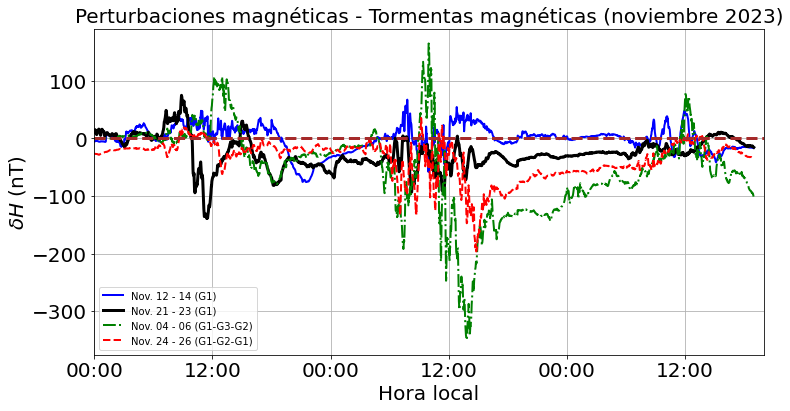

In [63]:
fontsize=20
dt_format = '%Y-%m-%d %H:%M:%S'
dt_a = datetime.datetime(year,month,day1,0,0)
dt_b = datetime.datetime(year,month,day1+2,20,0)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.array(h_delta_a.index)- pd.Timedelta(hours=5),h_delta_d.values, label='%s. %02d - %02d (G1)' % (str_month[0:3],storm_day10,storm_day10+2),color='blue',lw=2)
ax.plot(np.array(h_delta_a.index)- pd.Timedelta(hours=5),h_delta_b.values, label='%s. %02d - %02d (G1)' % (str_month[0:3],storm_day4,storm_day4+2),color='black',linestyle='solid',lw=3)
ax.plot(np.array(h_delta_a.index)- pd.Timedelta(hours=5),h_delta_a.values,label='%s. %02d - %02d (G1-G3-G2)' % (str_month[0:3],storm_day1,storm_day1+2), color='green',linestyle='-.',lw=2)
ax.plot(np.array(h_delta_a.index)- pd.Timedelta(hours=5),h_delta_c.values, label='%s. %02d - %02d (G1-G2-G1)' % (str_month[0:3],storm_day7,storm_day7+2),color='red',lw=2,linestyle='dashed')#,linestyle=(0, (5, 2, 1, 2)),lw=3)

ax.set_xlim(dt_a, dt_b)
ax.xaxis_date()
date_format = mdates.DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('Hora local', fontsize=fontsize)
ax.set_ylabel(r'$\delta H$ (nT) ', fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.axhline(y=0,lw=3,linestyle='--',color='brown')
ax.grid()
ax.set_title(r'Perturbaciones magnéticas - Tormentas magnéticas (%s %d)' % (str_month.lower(),year) ,fontsize=fontsize)
plt.legend(fontsize=fontsize-10,loc='best')#,loc=(0.15,0.02))
plots_boletin = '/home/jp/Desktop-ROJ/Plots-Boletines/%02d/%s' % (year,str_month)
plt.savefig('%s/H-perturbations-geomagnetic-storms-%s-%d.pdf' % (plots_boletin,str_month.lower(),year),bbox_inches='tight')
plt.savefig('%s/H-perturbations-geomagnetic-storms-%s-%d.png' % (plots_boletin,str_month.lower(),year),bbox_inches='tight')